# Zipf Law

In [261]:
%matplotlib inline
from nltk import TweetTokenizer, FreqDist, word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import numpy as np
import operator

In [290]:
with open("agatha_christie.txt","r", encoding='utf-8-sig') as g:
    text = g.read()

In [305]:
text[4000:6204]

'e of a country squire. He had married two\nyears ago, and had taken his wife to live at Styles, though I\nentertained a shrewd suspicion that he would have preferred his mother\nto increase his allowance, which would have enabled him to have a home\nof his own. Mrs. Cavendish, however, was a lady who liked to make her\nown plans, and expected other people to fall in with them, and in this\ncase she certainly had the whip hand, namely: the purse strings.\n\nJohn noticed my surprise at the news of his mother’s remarriage and\nsmiled rather ruefully.\n\n“Rotten little bounder too!” he said savagely. “I can tell you,\nHastings, it’s making life jolly difficult for us. As for Evie—you\nremember Evie?”\n\n“No.”\n\n“Oh, I suppose she was after your time. She’s the mater’s factotum,\ncompanion, Jack of all trades! A great sport—old Evie! Not precisely\nyoung and beautiful, but as game as they make them.”\n\n“You were going to say——?”\n\n“Oh, this fellow! He turned up from nowhere, on the pret

In [274]:
text ="The girl bought the chocolate. The boy bought the horse. The boy ate the chocolate. The girl ate fruit"

In [185]:
words = word_tokenize(text.lower())
word_dist = FreqDist(words)
sort_word_dict =  sorted(word_dist.items(), key =  operator.itemgetter(1), reverse=True)
rank_list = np.array([rank+1 for rank, word in enumerate(sort_word_dict)])
ziph_constant =  2
freq_list = np.array([i[1] for i in sort_word_dict])

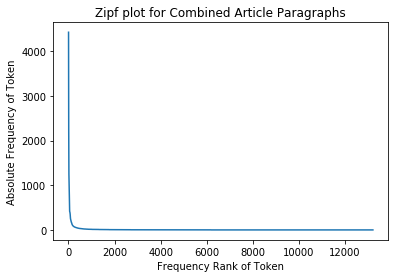

In [186]:

plt.title("Zipf plot for Combined Article Paragraphs")
plt.xlabel("Frequency Rank of Token")
plt.ylabel("Absolute Frequency of Token")
plt.plot(np.multiply(rank_list, ziph_constant), freq_list)

plt.show()

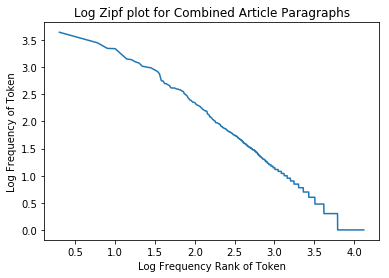

In [187]:
plt.title("Log Zipf plot for Combined Article Paragraphs")
plt.xlabel("Log Frequency Rank of Token")
plt.ylabel("Log Frequency of Token")
plt.plot(np.log10(np.multiply(rank_list,ziph_constant)),np.log10(freq_list))

plt.show()

# Zipf Law after removing punctuation, digits and using tweet tokenizer

In [172]:
from string import punctuation, digits

In [181]:
tknzr = TweetTokenizer()
words = tknzr.tokenize(text.lower())
rem_punct = punctuation.replace(",","")
rem_punct = rem_punct.replace(".","")
new_words = [word for word in words if  word not in rem_punct or word not in digits]
new_word_dist = FreqDist(new_words)
sort_word_dict_list =  sorted(word_dist.items(), key =  operator.itemgetter(1), reverse=True)
rank_list_1 = np.array([rank+1 for rank, word in enumerate(sort_word_dict)])
freq_list_1 = np.array([i[1] for i in sort_word_dict])

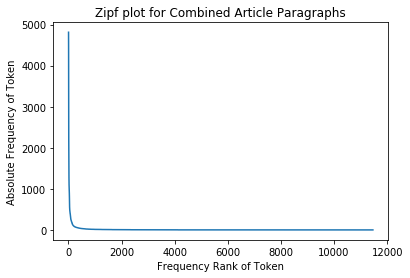

In [182]:
plt.title("Zipf plot for Combined Article Paragraphs")
plt.xlabel("Frequency Rank of Token")
plt.ylabel("Absolute Frequency of Token")
plt.plot(np.multiply(rank_list_1, ziph_constant), freq_list_1)

plt.show()

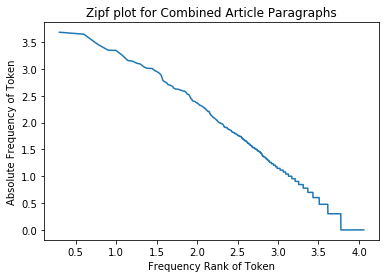

In [188]:
plt.title("Zipf plot for Combined Article Paragraphs")
plt.xlabel("Frequency Rank of Token")
plt.ylabel("Absolute Frequency of Token")
plt.plot(np.log10(np.multiply(rank_list_1, ziph_constant)), np.log10(freq_list_1))

plt.show()

# Language Modelling

In [330]:
from __future__ import division
from collections import Counter
from functools import reduce
def build_language_model(sent, n,left_padding = False, right_padding = False, left_padding_symbol = None, right_padding_symbol= None):
    sents = sent_tokenize(sent.lower())
    ngrams = []
    n_minus_1_grams = []
    for sen in sents:
        sen = sen.replace("\n"," ")
        if left_padding:
            sen = left_padding_symbol*n + sen
        if right_padding:
            sen = sen + right_padding_symbol*n
        words = tknzr.tokenize(sen)
        ngrams.extend([tuple(words[i:i+n]) for i in range(len(words)-n+1)])
        n_minus_1_grams.extend([tuple(words[i:i+n-1]) for i in range(len(words)-n)])
    counts = Counter(ngrams)
    counts_minus_1_grams = Counter(n_minus_1_grams)
    return(counts, counts_minus_1_grams)

def language_model(model,sent,n,left_padding = False, right_padding = False, left_padding_symbol = None, right_padding_symbol= None):
    sent = sent.replace("\n"," ")
    words = word_tokenize(sent.lower())
    if left_padding:
        sen = left_padding_symbol*n + sent
    if right_padding:
        sen = sent + right_padding_symbol*n
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    prob = reduce(lambda x, y: x*y,list(map(lambda i:(model[0][i]+1)/(model[1][i[:len(i)-1]]+len(ngrams)) if i in model[0] else 0.0001, ngrams)))
    return prob

In [331]:
model = build_language_model(text, 5, left_padding = True, right_padding = True, left_padding_symbol = "<s>", right_padding_symbol= "</s>")

In [332]:
language_model(model,sent,5,  left_padding = True, right_padding = True, left_padding_symbol = "<s>", right_padding_symbol= "</s>")

2.756361947986699e-09

In [336]:
sent = "This, Hastings Hercule Poirot, will effectually silence the\nsensational rumours which still persist."

In [338]:
print(language_model(model,sent,5))

2.039888847094188e-26
